In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
train_file = "./train.tsv"
test_file = "./test.tsv"

train_data = pandas.read_csv(train_file, delimiter='\t').to_numpy()
train_data2 = np.empty((train_data.shape[0], train_data.shape[1]-2))
train_data2[:, 0:] = train_data[:, 2:]
train_data2[:,3:4] = train_data2[:, 3:4] / 12.0 #月を0～1に正規化
train_data2[:,5:6] = train_data2[:,5:6] / 6.0   #曜日を0～1に正規化
train_data2[:,7:8] = train_data2[:,7:8] / 4.0   #天気を0～1に正規化
train_data2 = train_data2.astype(np.float32)

test_data = pandas.read_csv(test_file, delimiter='\t').to_numpy()
test_data2 = np.empty((test_data.shape[0], test_data.shape[1]-2))
test_data2[:, 0:] = test_data[:, 2:]
test_data2[:,3:4] = test_data2[:, 3:4] / 12.0 #月を0～1に正規化
test_data2[:,5:6] = test_data2[:,5:6] / 6.0   #曜日を0～1に正規化
test_data2[:,7:8] = test_data2[:,7:8] / 4.0   #天気を0～1に正規化
test_data2 = test_data2.astype(np.float32)

display(train_data2)
display(test_data2)

x = train_data2[:, 12:]
x = x.reshape(x.shape[0], 1)
print(x)
y = train_data2[:, :12]
y = y.reshape(y.shape[0], y.shape[1],1)
print(y)
test_y = test_data2.reshape(test_data2.shape[0], test_data2.shape[1], 1)

array([[ 1.    ,  0.    ,  1.    , ...,  0.81  ,  0.    , 16.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.8   ,  0.    , 40.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.8   ,  0.    , 32.    ],
       ...,
       [ 1.    ,  0.    , 12.    , ...,  0.58  ,  0.194 , 52.    ],
       [ 1.    ,  0.    , 12.    , ...,  0.62  ,  0.1343, 38.    ],
       [ 1.    ,  0.    , 12.    , ...,  0.66  ,  0.    , 31.    ]],
      dtype=float32)

array([[ 1.    ,  1.    ,  1.    , ...,  0.3788,  0.66  ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.3485,  0.66  ,  0.1343],
       [ 1.    ,  1.    ,  1.    , ...,  0.3485,  0.76  ,  0.    ],
       ...,
       [ 1.    ,  1.    , 12.    , ...,  0.2576,  0.6   ,  0.1642],
       [ 1.    ,  1.    , 12.    , ...,  0.2727,  0.56  ,  0.1343],
       [ 1.    ,  1.    , 12.    , ...,  0.2727,  0.65  ,  0.1343]],
      dtype=float32)

[[16.]
 [40.]
 [32.]
 ...
 [52.]
 [38.]
 [31.]]
[[[ 1.    ]
  [ 0.    ]
  [ 1.    ]
  ...
  [ 0.2879]
  [ 0.81  ]
  [ 0.    ]]

 [[ 1.    ]
  [ 0.    ]
  [ 1.    ]
  ...
  [ 0.2727]
  [ 0.8   ]
  [ 0.    ]]

 [[ 1.    ]
  [ 0.    ]
  [ 1.    ]
  ...
  [ 0.2727]
  [ 0.8   ]
  [ 0.    ]]

 ...

 [[ 1.    ]
  [ 0.    ]
  [12.    ]
  ...
  [ 0.4091]
  [ 0.58  ]
  [ 0.194 ]]

 [[ 1.    ]
  [ 0.    ]
  [12.    ]
  ...
  [ 0.3939]
  [ 0.62  ]
  [ 0.1343]]

 [[ 1.    ]
  [ 0.    ]
  [12.    ]
  ...
  [ 0.3788]
  [ 0.66  ]
  [ 0.    ]]]


In [3]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 400  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [4]:
y.shape

(8645, 12, 1)

In [5]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=100, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/100
217/217 [==============================] - 13s 50ms/step - loss: 26887.0547 - accuracy: 0.0140 - val_loss: 15812.4189 - val_accuracy: 0.0069
Epoch 2/100
217/217 [==============================] - 10s 47ms/step - loss: 19915.5449 - accuracy: 0.0140 - val_loss: 14267.6641 - val_accuracy: 0.0069
Epoch 3/100
217/217 [==============================] - 10s 47ms/step - loss: 18859.5820 - accuracy: 0.0140 - val_loss: 14365.9688 - val_accuracy: 0.0069
Epoch 4/100
217/217 [==============================] - 10s 47ms/step - loss: 18776.5020 - accuracy: 0.0140 - val_loss: 14452.4307 - val_accuracy: 0.0069
Epoch 5/100
217/217 [==============================] - 11s 50ms/step - loss: 18781.1426 - accuracy: 0.0140 - val_loss: 14458.3516 - val_accuracy: 0.0069
Epoch 6/100
217/217 [==============================] - 11s 49ms/step - loss: 18777.6367 - accuracy: 0.0140 - val_loss: 14437.4053 - val_accuracy: 0.0069
Epoch 7/100
217/217 [==============================] - 10s 47ms/step - loss: 17673

In [6]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 5s 20ms/step - loss: 2230.2708 - accuracy: 0.0095


[2230.270751953125, 0.009485251270234585]

In [7]:
predicted

array([[ 31.554203],
       [ 27.127932],
       [ 20.854944],
       ...,
       [148.67934 ],
       [129.36005 ],
       [112.66136 ]], dtype=float32)

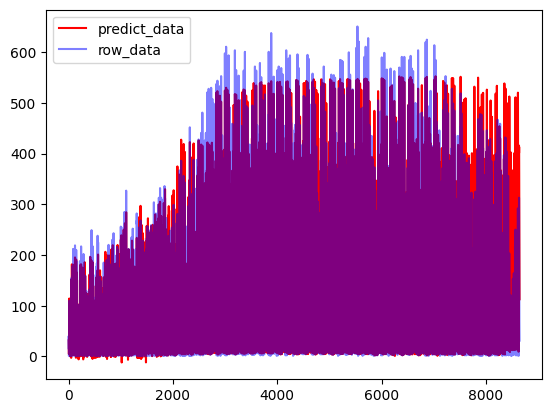

In [14]:
plt.figure()
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.show()

In [9]:
z = test_data2[:, :12]
z = z.reshape(z.shape[0], z.shape[1],1)
print(z)

[[[ 1.    ]
  [ 1.    ]
  [ 1.    ]
  ...
  [ 0.3788]
  [ 0.66  ]
  [ 0.    ]]

 [[ 1.    ]
  [ 1.    ]
  [ 1.    ]
  ...
  [ 0.3485]
  [ 0.66  ]
  [ 0.1343]]

 [[ 1.    ]
  [ 1.    ]
  [ 1.    ]
  ...
  [ 0.3485]
  [ 0.76  ]
  [ 0.    ]]

 ...

 [[ 1.    ]
  [ 1.    ]
  [12.    ]
  ...
  [ 0.2576]
  [ 0.6   ]
  [ 0.1642]]

 [[ 1.    ]
  [ 1.    ]
  [12.    ]
  ...
  [ 0.2727]
  [ 0.56  ]
  [ 0.1343]]

 [[ 1.    ]
  [ 1.    ]
  [12.    ]
  ...
  [ 0.2727]
  [ 0.65  ]
  [ 0.1343]]]


273/273 [==============================] - 5s 19ms/step
[[ 37.795444]
 [ 26.96441 ]
 [ 28.390812]
 ...
 [204.35619 ]
 [143.16725 ]
 [105.63202 ]]


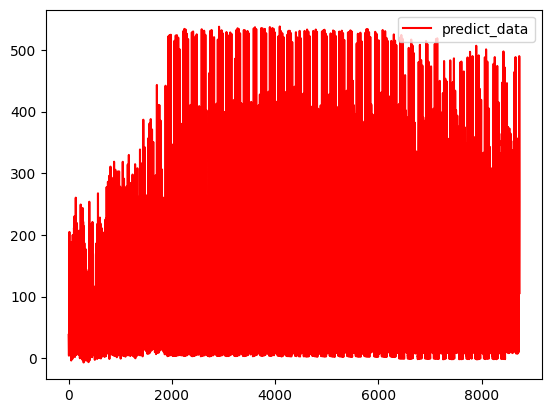

In [15]:
predicted2 = model.predict(z)
print(predicted2)

plt.figure()
plt.plot(range(0,len(predicted2)),predicted2, color="r", label="predict_data")
plt.legend()
plt.show()
#予測の精度が悪いか？